# Exploratory Data Analysis: Used Cars
First approach to the data source in order to determine the features and target of the model.

Exploring the different variables will be a good approach to evaluate the impact they have on the final price.

### Importing the main libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data

In [2]:
root = '../data/merged_cars.csv'

In [3]:
df = pd.read_csv(root)

df.head()

,title,brand,model,type,year,kms,city,gearbox,doors,seats,...,width,trunk_vol,max_speed,urban_cons,xtrurban_cons,mixed_cons,weight,tank_vol,acc,price
0,Smart Fortwo Cabrio 52 Mhd Pure Aut.,SMART,FORTWO,sports,2014,37125,Alicante,Automatic,2,2,...,156,0,145,4.6,4.0,4.3,780,33,13.7,5500
1,Volkswagen Scirocco 2.0 Tsi,VOLKSWAGEN,SCIROCCO,sports,2009,0,Barcelona,Manual,3,4,...,181,292,235,9.9,6.1,7.6,1373,55,7.2,10900
2,Bmw Serie 2 218da Gran Coupé,BMW,SERIE 2,sports,2021,0,Cantabria,Automatic,4,5,...,180,430,222,5.4,2.9,4.2,1545,42,8.5,36100
3,Bmw X4 Xdrive 20d,BMW,X4,sports,2017,85000,Girona,Automatic,5,5,...,188,500,212,6.1,5.0,5.4,1740,67,8.0,28000
4,Dodge Viper Srt-10,DODGE,VIPER,sports,2005,95017,Unknown,Automatic,2,2,...,191,0,0,27.3,14.7,21.0,1546,70,3.9,27990


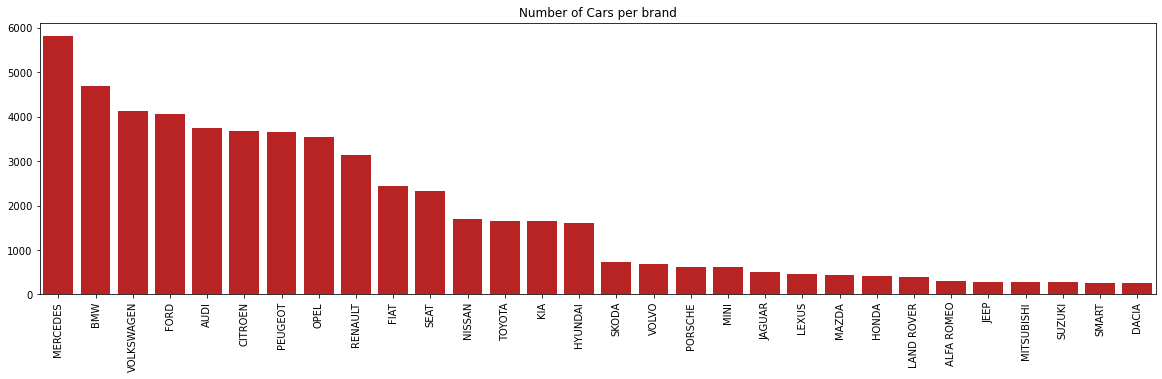

In [4]:
plt.style.use('tableau-colorblind10')

plt.figure(figsize = (20,5))

data = df.brand.value_counts().head(30)

ax = sns.barplot(x=data.index, y=data.values, color='#d10a0a')

plt.title('Number of Cars per brand')
plt.xticks(rotation=90)

plt.show()

In [5]:
df_brands = df.groupby('brand')['price'].mean().reset_index()

df_brands.head()

,brand,price
0,ABARTH,20425.888889
1,ALFA ROMEO,20813.972881
2,ALPINE,56466.666667
3,ASPID,222222.000000
4,ASTON MARTIN,100545.000000


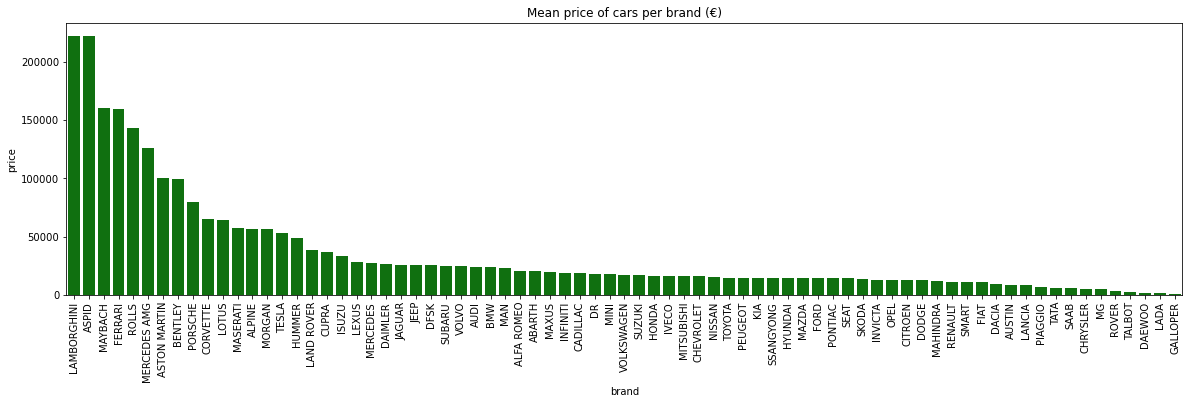

In [6]:
plt.style.use('tableau-colorblind10')

plt.figure(figsize = (20,5))

df_brands = df_brands.sort_values('price', ascending=False)

ax = sns.barplot(x=df_brands.brand, y=df_brands.price, color='g')

plt.title('Mean price of cars per brand (€)')
plt.xticks(rotation=90)

plt.show()

## Cars' Prices
Once we have detected the top used cars brands and the most expensive cars, it is time to detect their distribution 

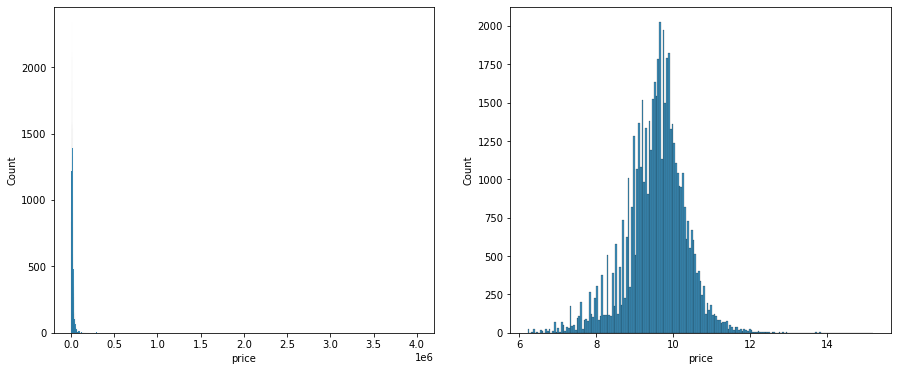

In [7]:
plt.style.use('tableau-colorblind10')
fig, ax = plt.subplots(1, 2, figsize=(15,6))

x = df.price

sns.histplot(x, ax=ax[0])
sns.histplot(np.log(x), ax=ax[1])

plt.show()

## Dealing with outliers in price

In [8]:
df = df[df.price < 4000000]

In [9]:
df[df.price == df.price.max()]

,title,brand,model,type,year,kms,city,gearbox,doors,seats,...,width,trunk_vol,max_speed,urban_cons,xtrurban_cons,mixed_cons,weight,tank_vol,acc,price
2946,Porsche 911 Carrera Rs,PORSCHE,911,sports,1973,50000,Barcelona,Manual,2,4,...,174,0,0,0.0,0.0,0.0,1270,0,5.0,999999
3202,Ferrari Testarossa,FERRARI,TESTAROSSA,sports,1986,59000,Barcelona,Manual,2,2,...,0,0,0,0.0,0.0,0.0,1505,0,0.0,999999
3993,Porsche 911 Carrera Rs,PORSCHE,911,sports,1973,50000,Barcelona,Manual,2,4,...,174,0,0,0.0,0.0,0.0,1270,0,5.0,999999
5070,Porsche 911 Carrera Rs,PORSCHE,911,sports,1995,136000,Barcelona,Manual,2,4,...,174,0,0,0.0,0.0,0.0,1270,0,5.0,999999


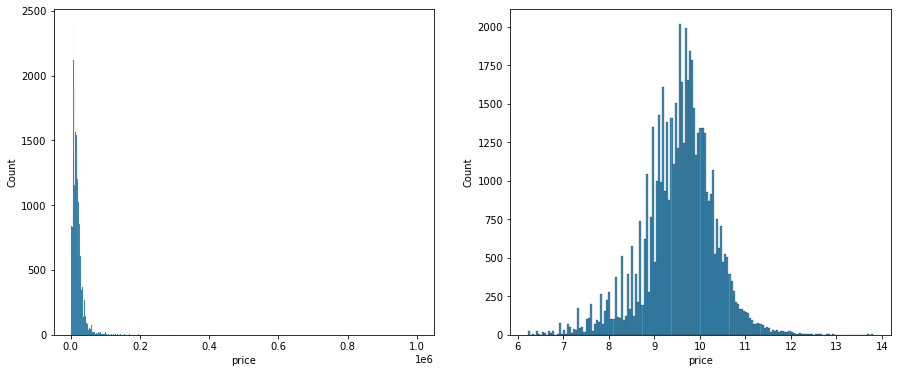

In [10]:
plt.style.use('tableau-colorblind10')
fig, ax = plt.subplots(1, 2, figsize=(15,6))

x = df.price

sns.histplot(x, ax=ax[0])
sns.histplot(np.log(x), ax=ax[1])

plt.show()

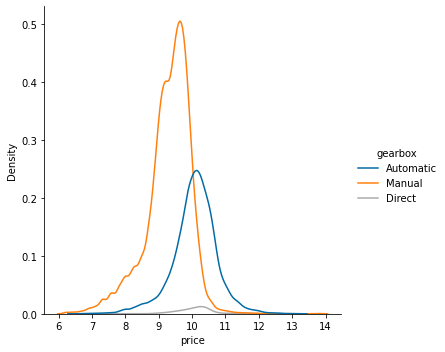

In [11]:
x = df.price

sns.displot(data = df, x=np.log(df.price), kind='kde', hue='gearbox')

plt.show()

## Detecting the number of NaN per column
Deciding how to replace each of them.

In [12]:
df = df.mask(df==0)

In [13]:
df.isna().sum()

title               0
brand               0
model               0
type                0
year                0
kms              2754
city                0
gearbox             0
doors               0
seats               0
power               0
color               0
co2_emiss        4327
fuel_type           0
warranty            0
dealer              0
chassis             0
height            425
length            427
width              86
trunk_vol        8986
max_speed        5459
urban_cons       2790
xtrurban_cons    2681
mixed_cons       1914
weight             71
tank_vol         3617
acc              4928
price               0
dtype: int64

In [14]:
cols_fill_zero = ['max_speed', 'height', 'length', 'width', 'trunk_vol', 'urban_cons',
                  'xtrurban_cons', 'mixed_cons', 'weight', 'tank_vol', 'acc']

for col in cols_fill_zero:
    df[col] = df[col].fillna(df.groupby(['brand', 'model'])[col].transform('mean'))
    df[col] = df[col].fillna(df.groupby('brand')[col].transform('mean'))

In [15]:
df[(df.brand == 'SEAT') & (df.co2_emiss.isna())][['brand', 'model', 'co2_emiss']]

,brand,model,co2_emiss
15453,SEAT,ALHAMBRA,NaN
15687,SEAT,ALHAMBRA,NaN
19315,SEAT,ALHAMBRA,NaN
19747,SEAT,ALTEA,NaN
19749,SEAT,ALHAMBRA,NaN
...,...,...,...
48332,SEAT,IBIZA,NaN
48379,SEAT,CÓRDOBA,NaN
49206,SEAT,LEÓN,NaN
50622,SEAT,IBIZA,NaN


In [16]:
# Condition for electric cars: year > 2018
df.loc[df.year < 2018, 'co2_emiss'] = df['co2_emiss'].fillna(df.groupby(['brand', 'model'])['co2_emiss'].transform('mean'))

In [17]:
df.isna().sum()

title               0
brand               0
model               0
type                0
year                0
kms              2754
city                0
gearbox             0
doors               0
seats               0
power               0
color               0
co2_emiss        1532
fuel_type           0
warranty            0
dealer              0
chassis             0
height              4
length              4
width               4
trunk_vol         126
max_speed          35
urban_cons         93
xtrurban_cons      92
mixed_cons         91
weight              0
tank_vol          108
acc               138
price               0
dtype: int64

#### Zeros are only valid on 'co2_emissions' & 'kms' columns

In [18]:
# Defining columns with NaN value
dropna_subset = df.columns[df.isna().any()].drop(['kms', 'co2_emiss'])
dropna_subset

Index(['height', 'length', 'width', 'trunk_vol', 'max_speed', 'urban_cons',
       'xtrurban_cons', 'mixed_cons', 'tank_vol', 'acc'],
      dtype='object')

In [19]:
df.shape

(55972, 29)

In [20]:
df = df.dropna(subset=dropna_subset)
df.shape

(55722, 29)

In [21]:
df.head()

,title,brand,model,type,year,kms,city,gearbox,doors,seats,...,width,trunk_vol,max_speed,urban_cons,xtrurban_cons,mixed_cons,weight,tank_vol,acc,price
0,Smart Fortwo Cabrio 52 Mhd Pure Aut.,SMART,FORTWO,sports,2014,37125.0,Alicante,Automatic,2,2,...,156.0,203.775510,145.0,4.6,4.0,4.3,780.0,33.0,13.7,5500
1,Volkswagen Scirocco 2.0 Tsi,VOLKSWAGEN,SCIROCCO,sports,2009,NaN,Barcelona,Manual,3,4,...,181.0,292.000000,235.0,9.9,6.1,7.6,1373.0,55.0,7.2,10900
2,Bmw Serie 2 218da Gran Coupé,BMW,SERIE 2,sports,2021,NaN,Cantabria,Automatic,4,5,...,180.0,430.000000,222.0,5.4,2.9,4.2,1545.0,42.0,8.5,36100
3,Bmw X4 Xdrive 20d,BMW,X4,sports,2017,85000.0,Girona,Automatic,5,5,...,188.0,500.000000,212.0,6.1,5.0,5.4,1740.0,67.0,8.0,28000
4,Dodge Viper Srt-10,DODGE,VIPER,sports,2005,95017.0,Unknown,Automatic,2,2,...,191.0,344.615385,189.5,27.3,14.7,21.0,1546.0,70.0,3.9,27990


### Applying na_dealer function

In [22]:
import sys
sys.path.append('..')
from modules.na_dealer import cars_na

In [24]:
df = cars_na(df)
df.shape

(55722, 29)

In [25]:
df.head()

,title,brand,model,type,year,kms,city,gearbox,doors,seats,...,width,trunk_vol,max_speed,urban_cons,xtrurban_cons,mixed_cons,weight,tank_vol,acc,price
0,Smart Fortwo Cabrio 52 Mhd Pure Aut.,SMART,FORTWO,sports,2014,37125.0,Alicante,Automatic,2,2,...,156.0,203.775510,145.0,4.6,4.0,4.3,780.0,33.0,13.7,5500
1,Volkswagen Scirocco 2.0 Tsi,VOLKSWAGEN,SCIROCCO,sports,2009,0.0,Barcelona,Manual,3,4,...,181.0,292.000000,235.0,9.9,6.1,7.6,1373.0,55.0,7.2,10900
2,Bmw Serie 2 218da Gran Coupé,BMW,SERIE 2,sports,2021,0.0,Cantabria,Automatic,4,5,...,180.0,430.000000,222.0,5.4,2.9,4.2,1545.0,42.0,8.5,36100
3,Bmw X4 Xdrive 20d,BMW,X4,sports,2017,85000.0,Girona,Automatic,5,5,...,188.0,500.000000,212.0,6.1,5.0,5.4,1740.0,67.0,8.0,28000
4,Dodge Viper Srt-10,DODGE,VIPER,sports,2005,95017.0,Unknown,Automatic,2,2,...,191.0,344.615385,189.5,27.3,14.7,21.0,1546.0,70.0,3.9,27990


After the NaN values analysis, **250** were dropped due to missing values in some of the basic fields.

However, up to 8986 rows (NaN rows in 'trunk_vol') could have been dropped if this analysis was not run. Therefore, **8736 rows** were saved to be part of this analysis with a valuable contribution.

## Having a look at the correlations